# Introduction to ANN's with Keras

## The Multilayer Perceptron & Backpropogation

When an ANN contains a deep stack of hidden layers, it is called a deep nueral network (dnn). The field of deep learning studies DNN's, and more generally models containing deep stacks of computations.

ANN's and DNN's are trained via the `backpropogation` training algorithm, which in short is Gradient Descent using an efficient technique for computing the gradients automatically. The goal of backpropagation is to minimize the error between the predicted output of the network and the actual target values.

The Backpropagation algorithm works by handling one mini-batch at a time (e.g, containing 32 training examples each) and goe through the full training set multiple times. Each pass is called an `epoch`. 

For each training instance the backpropogation algorith works by first making a prediction (forward pass) and measuring the error, then goes through each layer in reverse to measure the error contribution from each connection (reverse pass) and finally tweaks the connection weights to reduce the error (gradient descent step).

* **Initialization**: Initialize the weights and biases of the neural network with small random values. Define the learning rate, which determines the size of the steps taken during the optimization process.
* **Forward Pass**: Each mini-batch is fed forward through the network layer by layer. Neurons in each layer perform a weighted sum of their inputs, add a bias, and then apply an activation function to produce the output.
* **Calculate Error**: Compare the network's output with the actual target values to calculate the error. The error is typically measured using a loss or cost function, which quantifies the difference between the predicted and actual values.
* **Backward Pass**: The goal is to then update the weights and biases in the network to reduce the error by calculateing the gradient of the error with respect to the weights and biases using the chain rule of calculus. This is done via propagating the gradient backward through the network until the algorithm reaches the input layer. to find how much each weight and bias contributed to the error.
* **Update Weights and Biases**: Adjust the weights and biases in the direction that reduces the error. This is done by subtracting a fraction of the gradient multiplied by the learning rate. The learning rate determines the step size in the weight and bias updates. It's crucial to choose an appropriate learning rate to balance convergence speed and stability.
* **Repeat**: Steps 2 to 5 are repeated for multiple epochs (passes through the entire training dataset) until the network's performance converges to an acceptable level. The backpropagation algorithm essentially iteratively adjusts the weights and biases of the neural network to minimize the error between predicted and actual outputs. This process is an optimization task, and the choice of the loss function, activation functions, and network architecture all play crucial roles in the success of the training process.

In order for the algorithm to work properly, the authors made a key change by replacing the step function with the logistic (sigmoid) function. This was essential, because the step function contains only flat segment so there was no gradient to work with (GD doesn't work on a flat surface) while the logistic function has a well defined nonzero derivitiave everywhere, allowing GD to make some progress at every step. The logistic function is an example of an `activation function`.

### Activation Functions 

An activation function is a mathematical operation applied to the output of each neuron (or node) in a neural network layer. 

Activation functions introduces non-linearity to a DNN, allowing it to learn from and model complex patterns in data. Without non-linear activation functions, the entire neural network would behave like a linear model, regardless of its depth.

The purpose of the activation function can be summarized as follows:

* **Introducing Non-linearity**: Linear transformations (such as weighted sums and biases) are limited to representing linear relationships. By applying non-linear activation functions, the network can learn and approximate non-linear mappings between inputs and outputs.
* **Enabling Complex Representations**: The stacking of non-linear activation functions in deep networks enables the modeling of intricate relationships and hierarchies in data, allowing the network to learn and represent complex patterns.

Here are some commonly used activation functions in deep neural networks:

* **Sigmoid Function (Logistic):**
    * _MOST COMMON_
    * Outputs values between 0 and 1.
    * Historically used in the output layer for binary classification problems, but not as common in hidden layers due to the vanishing gradient problem.
* **Hyperbolic Tangent (tanh)**:
    * _MOST COMMON_
    * Outputs values between -1 and 1.
    * Similar to the sigmoid but with a higher output range.
* **Rectified Linear Unit (ReLU)**:
    * _MOST COMMON_
    * Outputs zero for negative inputs and passes positive inputs as is.
    * Widely used in hidden layers due to its simplicity and effectiveness in training deep networks.
* **Leaky ReLU**:
    * Similar to ReLU but allows a small, non-zero gradient for negative inputs, addressing the "dying ReLU" problem where neurons can become inactive during training.
* **Parametric ReLU (PReLU)**:
    * An extension of Leaky ReLU where  α is learned during training.
* **Exponential Linear Unit (ELU)**:
    * Smoothly saturates for negative inputs, potentially alleviating some issues with ReLU.
    
The choice of activation function depends on the specific characteristics of the data and the problem at hand. Experimentation and consideration of issues like vanishing gradients during training can guide the selection of an appropriate activation function for a given neural network architecture.

## Regression MLP's

If you want to predict a single value (e.g the price of a house, given many it's features) than you just need a single out neuron: it's output as the predicted value. For multivariate regression (e.g predicting multiple values at once), you need one ouput neuron per output dimension. 

In general, when an MLP for regression, you do not want to use any activation functino for the output neurons so they are free to output any rangeof values. 

* If you want to guarantee that the ouput will always be positive, than you can use the `ReLU` or `Softplus` (which is a smooth variant of `ReLU` activation functions in the ouput layer. 
* If you want to guarentee that the output falls within a range of values, than you can use `Logistic` or `Hyperbolic Tangent` activation functions and then scale the labels to the appropriate range: 0 to 1 of the `logistic` function and 0 to 1 for the `Hyperbolic Tangent`.

The loss function to use during training is typically the MSE, but if you have a lot of outliers in the training set, you may prefer to use the MAE instead. You can also use Huber loss, which is a combination of both.

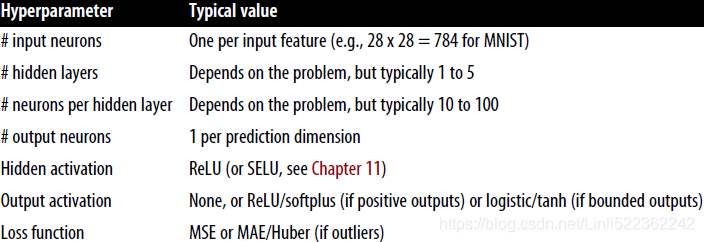

## Regression MLP's

MLP's can also be used for classification tasks. For a binary classification problem, you will jsut need a single ouput neior using the logistic activation function: the output will be a number between 0 and 1, which you can interpret as the estimated probability of a given class. The estimated probability of the negative class is equal to 1 minus that number.

MLP's can also easily handle multilabel binary classification tasks - for example, you could have an email classification system that predicts whether the incoming email is ham or spam, and simultaneously predicts whether it is an urgent or nonurgent email. In this case, you would need two output neurons for that both using the logistic activation functions:

* The first would predict the probability that email is spam.
* The second would predict the probability that the email is urgent.

If each instance can belong only to a single class (e.g **Multiclass Classification**, out of three or more possible classes (e.g classes 0 - 9 for digit image classification) then you need to have one ouput neuron per class, and you should use the `softmax` activation function for the whole output layer. The `softmax` function will ensure that all the estimated probabilities are between 0 and 1 and that they add up to 1, which is required if the classes are exclusive.

Regarding the loss function, since we are predicting the probability distrubutions, the cross-entropy loss function is usually a good choice.

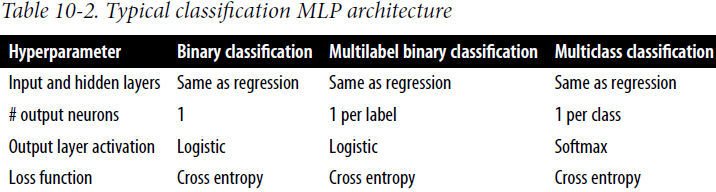

## Implementing MLPs w/ Keras

Keras is a high-level Deep Learning API that allows you to easily build, train, evaluate and execute all sorts of nueral networks, and has been built into Tensorflow.

In [12]:
import tensorflow as tf
import keras

print(f"Tensorflow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")

Tensorflow Version: 2.13.0
Keras Version: 2.13.1


## Building an Image Classifier Using the Sequential API

In [15]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [17]:
print(f"Shape of data: {X_train_full.shape}")
print(f"Data Type: {X_train_full.dtype}")

Shape of data: (60000, 28, 28)
Data Type: uint8


Since we are going to scale the features using Gradient Descent, we need to scale the input features. For simplicity, we'll scale the the pixel intensities down to the 0-1 range by dividing them by 255.0

In [24]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0,
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Define the class names from 0 - 9:

In [25]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

class_names[y_train[0]]

'Coat'

### Creating the model using Sequential API

In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

* The first line creates a Sequential model, which is the simpliest kiund of Keras model for NN's that are just composed of a single stack of layers connected sequentially.
* Next, we build the first layer and add it to the model. It is a `Flatten` layer whose role is to convert each input image into a 1D array: if it receives input data `X`, it computes `X.reshape(-1, 1)`. Since it is the first layer in the model, you should specifiy the `input_shape`, which doesn't inclue the batch size, only the shape of the instances. Alternatively, you could a `keras.layers.InputLayer(input_shape=[28,28])` as the first layer.
* Next, we add a dense layer hidden layer with 300 neurons. It will use the `ReLU` activation function. Each Dense layer manages it's own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron).
* Then we add a second Dense hidden layer with 100 neurons, also using the `ReLU` activation function.
* Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function (because the classes are exclusive).

Instead of adding the layers one by one as we just did, you can pass a list of layers when creating the `Sequential` model:

In [29]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

The models `summary()` method displays nall the model's layers including each layers name (which is automatically generated unless you set it when creating the layers

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Note that the Dense Lyers often a lot of parameters. For example, the first hidden layer has `784 * 300 (connection weights) + 300 (bias terms) = 235,500` parameters! This gives the model quite a lot flexability to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot training data.

You can easily get a models list of layers, to fetch a layer by it's index, or fetch it by name:

In [31]:
model.layers

In [32]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [34]:
model.get_layer('dense_3') is hidden1

True

All the weight parameters of a layer can be accessed using it's `get_weights()` and `set_weights()` methods. For Dense layers, this includes both the connection weights & bias terms:

In [36]:
weights, biases = hidden1.get_weights()

print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

[[ 0.04505273 -0.06608322  0.03997401 ...  0.02293155 -0.05404384
  -0.0337557 ]
 [ 0.00354819 -0.00454816 -0.01004562 ...  0.04966542 -0.05148859
   0.03715603]
 [ 0.0611679   0.05435592  0.00979207 ... -0.05707815 -0.06693569
   0.05774641]
 ...
 [-0.03151373  0.01392872  0.02888684 ...  0.02528169 -0.01336233
  -0.00158637]
 [ 0.02240334 -0.06819135 -0.00820424 ...  0.06135356  0.0351916
  -0.04693248]
 [-0.01621694  0.03313296  0.06252961 ... -0.0172244   0.02683141
   0.03346407]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Notice that the Dense layer initialized the connection wieghts randomly, which is need to break symmetry as we discussed earlier, and the biases were initialized to zeros. If you ever want to use a different initlaization method, you can set `kernal_initializer` or `bias_initi